## Final  DSC550 Project Case Study - Employee Attrition

### Dan Wiltse 


### Problem Statement:

Employee attrition is a problem for businesses, not only because of loss of productivity when employees leave but also the time and money that is needed to recruit new people to replace them and train them to proficiency.  So identifying the reasons employees  may be likely to leave can help prevent loss of productivity and knowledge loss when people unexpectedly leave the company.

### Proposal:

Using the employee attrition dataset, I will look to predict employees likely to leave the company by using different modeling techniques.

I will use several different techniques  (Logistic Regression, Decision Tree and Random Forest) to try to predict outcomes and measure performance using a confusion matrix and looking at the ROC graph.



### Dataset Overview

The files comes from a fictional IBM HR Attrition dataset, which can be found below:

https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset


The dataset has 35 variables for 1470 employee records

### Part One: Initial Graph Analysis

I will look at the variables in the dataset to look for outliers and missing values. There may be some unnessary or highly related variables, so will see which ones may be removed as part of feature reduction. I will also look at the dependent variable (attrition) to see how balanced the dataset is, and how I might need to rebalance my training and testing data to make sure my results are valid.

#### 1) Load Initial Dataset Packages

In [1]:
#Data Exploratin packages
import pandas as pd
import numpy as np

#Data Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

#### 2) Get Data


In [2]:
df_churn = pd.read_csv('EmployeeChurn.csv')

In [3]:
df_churn.head()

,Age,Attrition,AttritionFlag,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,49,No,0,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,33,No,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,27,No,0,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,32,No,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,59,No,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


#### 3) Initial Data Wrangling/Exploration

In [4]:
# Let's first transform attrition into a binary numerical classification (1 or 0)
#I added Attrition Flag field but will remove later in analysis because it was formatting incorrectly

df_churn["Attrition"] = df_churn["Attrition"].replace(["Yes", "No"], [1, 0])
df_churn.head()

,Age,Attrition,AttritionFlag,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,49,0,0,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,33,0,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,27,0,0,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,32,0,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,59,0,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [5]:
#Dependent variable is unbalanced, so will need to address this when modeling

print('Proportion of employee attrition in the data:')
df_churn['Attrition'].value_counts(normalize=True)

Proportion of employee attrition in the data:


0    0.838776
1    0.161224
Name: Attrition, dtype: float64

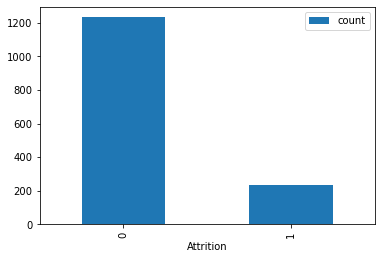

In [6]:
#Check balance of dependent variable
df_bar = df_churn
df_churn.groupby('Attrition')['Attrition'].agg(['count']).plot(kind='bar');

Review Structure of the dataset

In [7]:
df_churn.describe()

,Age,Attrition,AttritionFlag,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
#Transpose dataset to see 5 sample records and structure of the data
df_churn.sample(5).transpose()

,1302,1211,700,311,9
Age,22,34,30,46,29
Attrition,1,0,0,0,0
AttritionFlag,1,0,0,0,0
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,185,1278,289,1249,1299
Department,Research & Development,Sales,Research & Development,Research & Development,Research & Development
DistanceFromHome,23,1,2,7,27
Education,4,4,3,3,3
EducationField,Medical,Medical,Technical Degree,Life Sciences,Medical
EmployeeCount,1,1,1,1,1


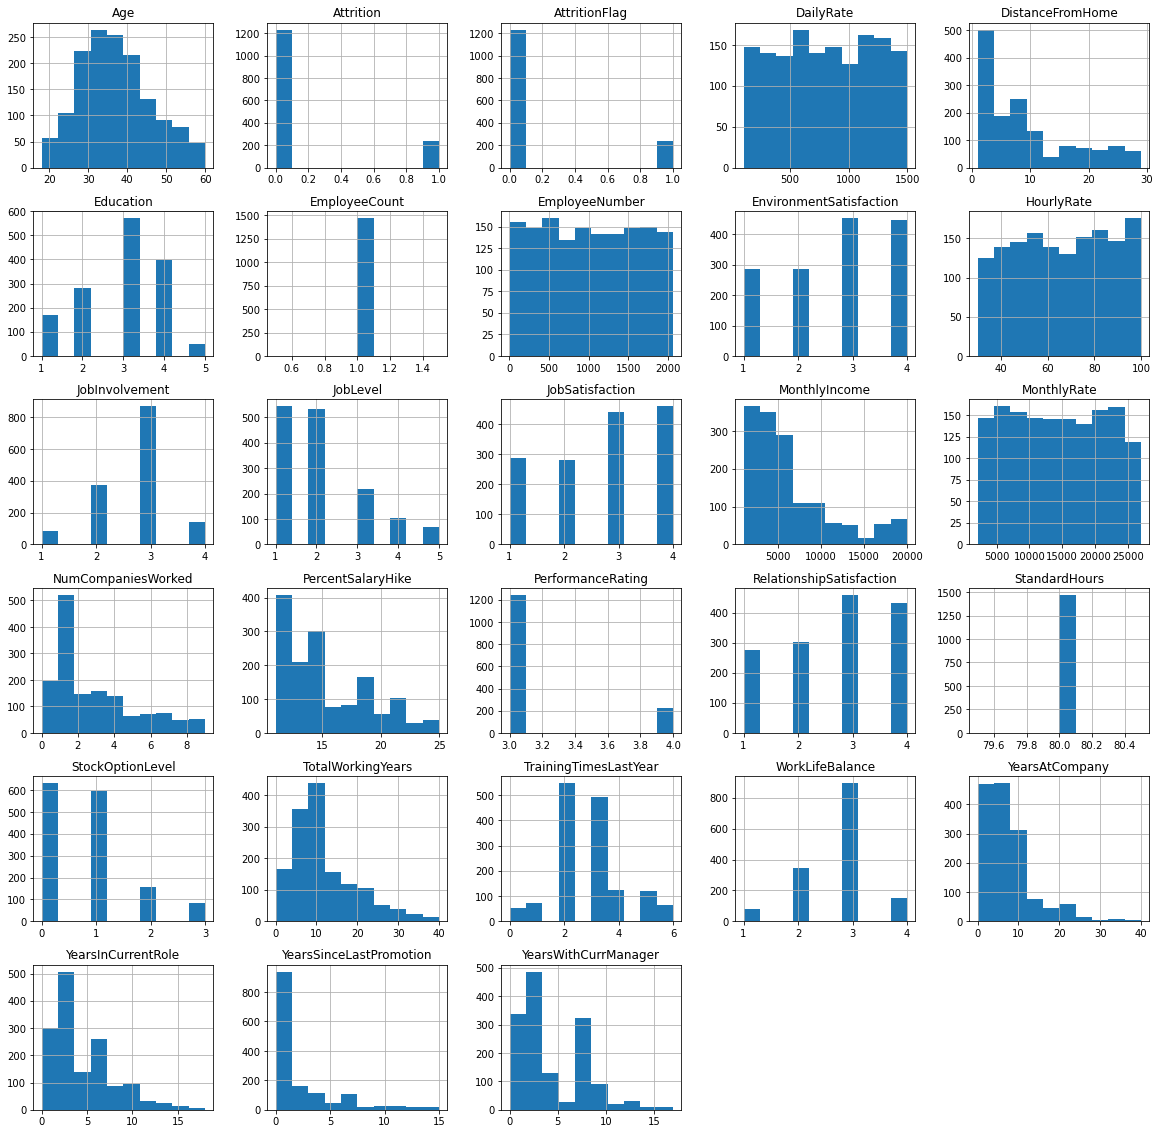

In [9]:
#Build out histograms of numerical metrics
df_churn.hist(figsize=(20,20))
plt.show();

In [10]:
# Shorten clean df variable name and filter for employees who have left

df = df_churn
df_v = df.copy()
df_v_a = df_v[
    df_v["Attrition"] == 1
]

display(df_v.shape)
display(df_v_a.shape)

(1470, 36)

(237, 36)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data

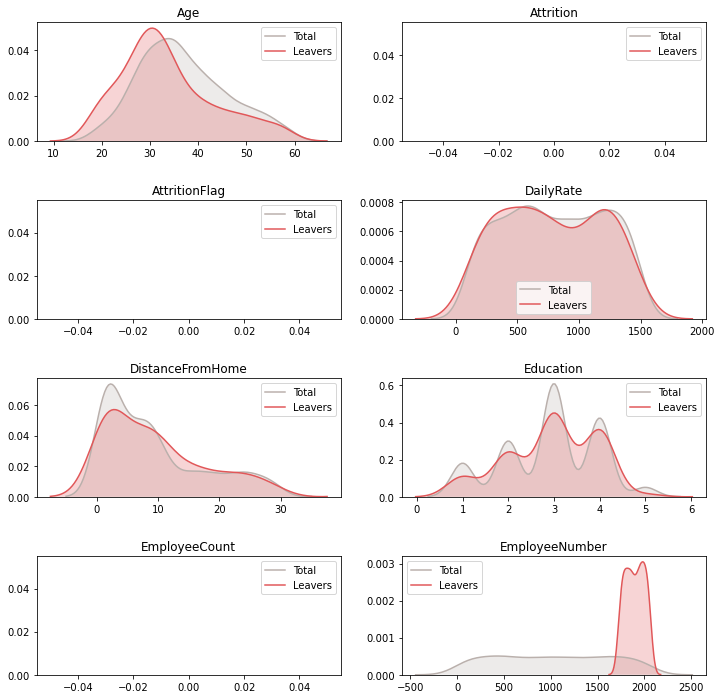

In [11]:
titles = []
for col in df_v:
    if df_v[col].dtype != object:
        titles.append(col)

fig = plt.figure(figsize = (12,12))
i = 421

for col in titles[:8]:
    ax = fig.add_subplot(i)
    sns.kdeplot(data = df_v[col], shade = True, ax = ax, color = "#bab0ac")
    sns.kdeplot(data = df_v_a[col], shade = True, ax = ax, color = "#e15759")
    ax.set_title(col)
    ax.legend(["Total", "Leavers"])
    i+=1
    if i > 428:
        break
    
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)

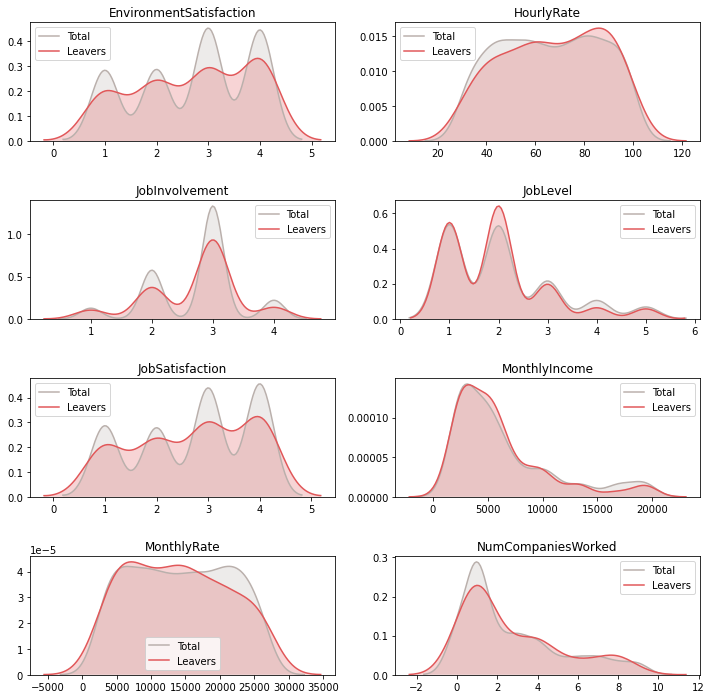

In [12]:
fig = plt.figure(figsize = (12,12))
i = 421

for col in titles[8:]:
    ax = fig.add_subplot(i)
    sns.kdeplot(data = df_v[col], shade = True, ax = ax, color = "#bab0ac")
    sns.kdeplot(data = df_v_a[col], shade = True, ax = ax, color = "#e15759")
    ax.set_title(col)
    ax.legend(["Total", "Leavers"])
    i+=1
    if i > 428:
        break
    
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


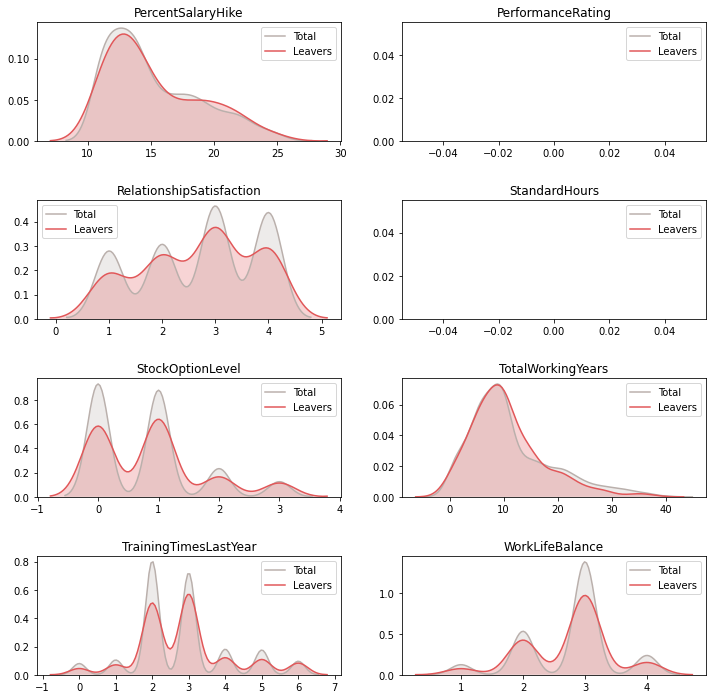

In [13]:
fig = plt.figure(figsize = (12,12))
i = 421

for col in titles[16:]:
    ax = fig.add_subplot(i)
    sns.kdeplot(data = df_v[col], shade = True, ax = ax, color = "#bab0ac")
    sns.kdeplot(data = df_v_a[col], shade = True, ax = ax, color = "#e15759")
    ax.set_title(col)
    ax.legend(["Total", "Leavers"])
    i+=1
    if i > 428:
        break
    
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)

## Correlations

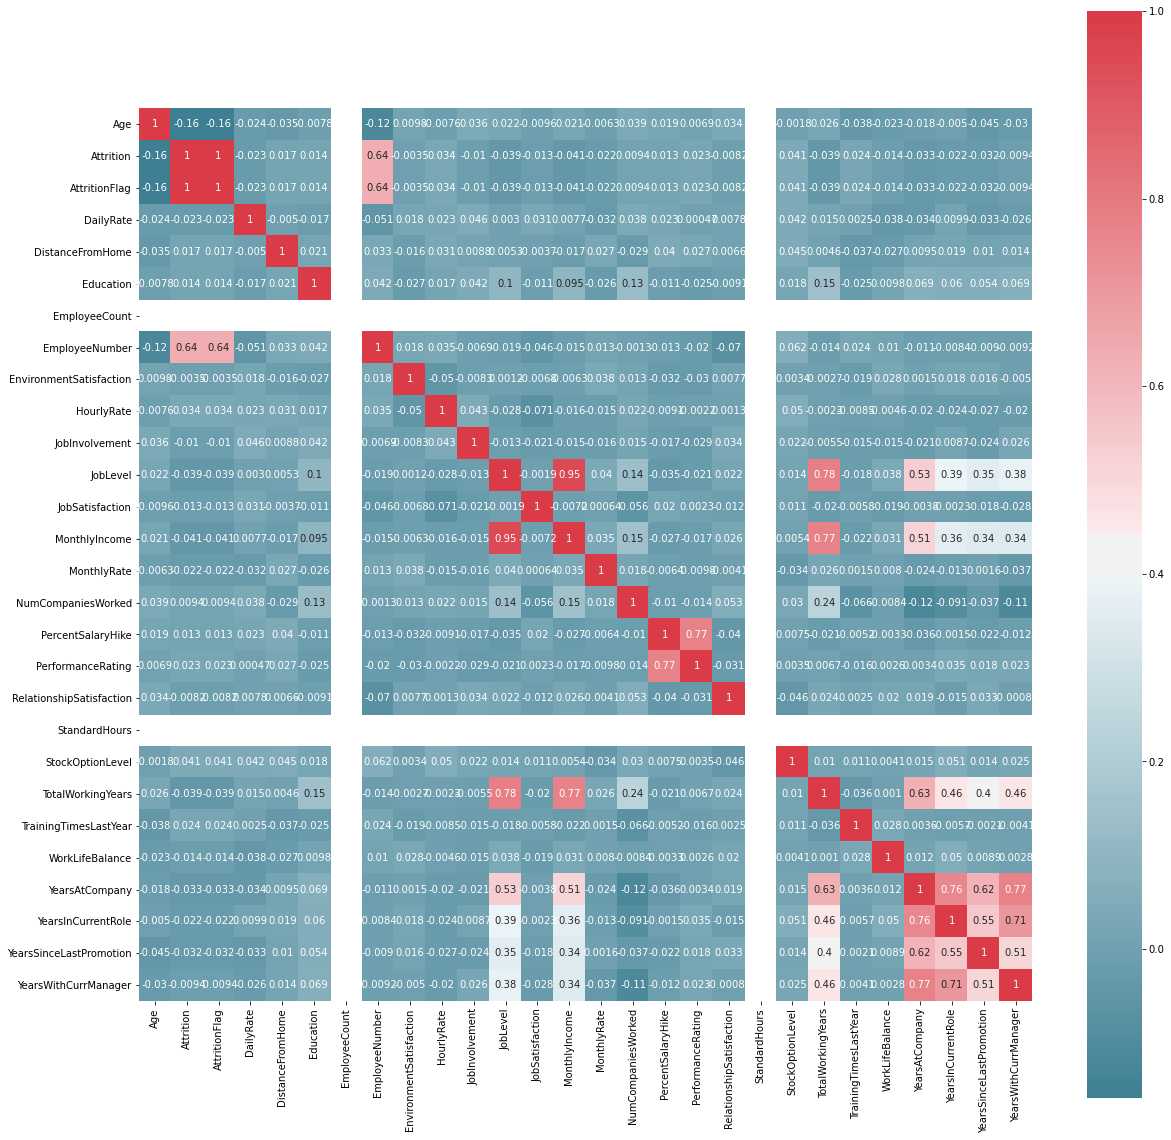

In [14]:
f, ax = plt.subplots(figsize=(20, 20))
corr = df_churn.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True);

### Check for employees with missing records

#### Forunately, there are no employees with missing records in the data

In [15]:
print("The number of rows with missing records is:" )
df_churn.isnull().sum().sum()

The number of rows with missing records is:


0

## Part One Summary:

1) 83.8% of employees in the dataset are still with the company, while good for the company, leaves the analysis with an unbalanced dataset. This will need to be closely reviewed in the modeling phase to make sure the differences don't impact the final findings

2) Younger employees are more likely to leave the company compared to the overall dataset.

3) People who live further away from work are more likely to leave than employees who live closer to work.

4) Employees with higher Work Life balance ratings are less likely to leave the company than average employee

5) There are several highly correlated fields (eg Job Level and Monthly Income) that will need to be addressed during Feature Reduction process

## Part Two: Feature Reduction

#### Import packages needed for Feature Reduction


In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA

##### Look for variables that have unique responses


In [17]:
df_churn.nunique().sort_values()

Over18                         1
EmployeeCount                  1
StandardHours                  1
Gender                         2
Attrition                      2
AttritionFlag                  2
PerformanceRating              2
OverTime                       2
BusinessTravel                 3
Department                     3
MaritalStatus                  3
RelationshipSatisfaction       4
JobInvolvement                 4
JobSatisfaction                4
StockOptionLevel               4
WorkLifeBalance                4
EnvironmentSatisfaction        4
JobLevel                       5
Education                      5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age       

In [18]:
#Drop the 5 fields that don't differentiate between employees from dataset
#3 fields with same value for all records
#1 record with unique record for all employees that won't inform analysis
#1 Remove Attrition, which is just label for the AttritionFlag field
df_churn = df_churn.drop(['Over18','StandardHours','EmployeeCount', 'EmployeeNumber', 'AttritionFlag'], axis = 1)

In [19]:
# Inspect the structure of the dataframe of remaining variables
df_churn.sample(5).transpose()
df_churn.shape

(1470, 31)

#### Label Encoding will be used to convert categorical variables into numerical ones

In [20]:
#Encoding categorical variables into numerical values with 2 or less values

le = LabelEncoder()
le_list = []

for col in df_churn:
    if df_churn[col].dtype == object:
        if len(df_churn[col].unique()) <= 2:
            le.fit(df_churn[col])
            df_churn[col] = le.transform(df_churn[col])
            le_list.append(col)

print(le_list, "are the columns that have been label encoded to 1 or 0")

['Gender', 'OverTime'] are the columns that have been label encoded to 1 or 0


In [21]:
df_churn.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,49,0,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,0,...,3,1,0,8,0,1,6,4,0,5
1,33,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,1,...,4,4,1,10,3,3,10,7,1,7
2,27,0,Travel_Rarely,1373,Research & Development,2,2,Other,4,1,...,3,2,0,7,3,3,0,0,0,0
3,32,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,0,...,3,3,0,8,3,3,8,7,3,0
4,59,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,3,4,1,6,3,3,2,2,2,2


In [22]:
#Encoding categorical variables into numerical values with 2 or more values

df_churn = pd.get_dummies(df_churn, drop_first = True)
df_churn.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,49,0,1102,1,2,2,0,94,3,2,...,0,0,0,0,0,0,1,0,0,1
1,33,0,279,8,1,3,1,61,2,2,...,0,0,0,0,0,1,0,0,1,0
2,27,0,1373,2,2,4,1,92,2,1,...,0,1,0,0,0,0,0,0,0,1
3,32,0,1392,3,4,4,0,56,3,1,...,0,0,0,0,0,1,0,0,1,0
4,59,0,591,2,1,1,1,40,3,1,...,0,1,0,0,0,0,0,0,1,0


In [23]:
df_churn.nunique().sort_values()

MaritalStatus_Single                    2
JobRole_Human Resources                 2
EducationField_Technical Degree         2
EducationField_Other                    2
EducationField_Medical                  2
EducationField_Marketing                2
EducationField_Life Sciences            2
Department_Sales                        2
Department_Research & Development       2
BusinessTravel_Travel_Rarely            2
BusinessTravel_Travel_Frequently        2
MaritalStatus_Married                   2
JobRole_Manufacturing Director          2
JobRole_Laboratory Technician           2
PerformanceRating                       2
JobRole_Manager                         2
OverTime                                2
Attrition                               2
JobRole_Sales Representative            2
JobRole_Research Director               2
Gender                                  2
JobRole_Research Scientist              2
JobRole_Sales Executive                 2
EnvironmentSatisfaction           

#### Next, I need to standardize the scale on remaining variables so it is consistent across fields in final analysis

In [24]:
#Crate list of fields that excludes attrition
field_list = []

for col in df_churn:
    if col != "Attrition":
        field_list.append(col)

In [25]:
print(field_list)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative', 'MaritalStatus_Married', 'Marital

In [26]:
scaler = MinMaxScaler(feature_range = (0,5))

for col in field_list:   
    df_churn[col] = df_churn[col].astype(float)
    df_churn[col] = scaler.fit_transform(df_churn[[col]])

df_churn.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,3.690476,0,3.579098,0.000000,1.25,1.666667,0.0,4.571429,3.333333,1.25,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
1,1.785714,0,0.633500,1.250000,0.00,3.333333,5.0,2.214286,1.666667,1.25,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
2,1.071429,0,4.549034,0.178571,1.25,5.000000,5.0,4.428571,1.666667,0.00,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1.666667,0,4.617037,0.357143,3.75,5.000000,0.0,1.857143,3.333333,0.00,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
4,4.880952,0,1.750179,0.178571,0.00,0.000000,5.0,0.714286,3.333333,0.00,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [27]:
# Inspect the structure of the dataframe
df_churn.sample(10).transpose()

,79,1133,60,662,944,858,725,781,821,383
Age,1.666667,1.547619,2.142857,1.904762,2.976190,1.547619,1.428571,3.214286,3.928571,1.309524
Attrition,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DailyRate,3.017180,3.178239,1.163207,1.424481,4.917681,4.012169,1.861131,0.322119,0.257695,0.540444
DistanceFromHome,0.714286,4.642857,0.000000,0.178571,0.000000,1.071429,2.321429,0.000000,1.250000,1.785714
Education,1.250000,2.500000,2.500000,2.500000,2.500000,1.250000,3.750000,1.250000,3.750000,2.500000
EnvironmentSatisfaction,1.666667,5.000000,0.000000,3.333333,3.333333,5.000000,3.333333,0.000000,5.000000,0.000000
Gender,5.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000,0.000000
HourlyRate,3.571429,4.071429,0.214286,1.357143,1.785714,1.428571,0.642857,2.071429,1.857143,0.928571
JobInvolvement,3.333333,5.000000,3.333333,1.666667,0.000000,3.333333,1.666667,1.666667,1.666667,3.333333
JobLevel,1.250000,0.000000,1.250000,0.000000,1.250000,5.000000,0.000000,0.000000,3.750000,0.000000


#### Looking at correlations to dependent variable

In [28]:
#Correlations with depdendent variable (Attrition)
importances = df_churn.drop("Attrition", axis=1).apply(lambda x: x.corr(df_churn.Attrition))
indices = np.argsort(importances)
print(importances[indices])

Age                                 -0.159205
Department_Research & Development   -0.061964
JobRole_Manager                     -0.046917
MonthlyIncome                       -0.041335
JobRole_Manufacturing Director      -0.039566
JobLevel                            -0.038709
TotalWorkingYears                   -0.038591
YearsAtCompany                      -0.033206
JobRole_Laboratory Technician       -0.032810
YearsSinceLastPromotion             -0.031870
MaritalStatus_Single                -0.030842
EducationField_Life Sciences        -0.025187
DailyRate                           -0.022596
MonthlyRate                         -0.021830
YearsInCurrentRole                  -0.021621
BusinessTravel_Travel_Frequently    -0.017310
BusinessTravel_Travel_Rarely        -0.016939
OverTime                            -0.016712
JobRole_Research Director           -0.015477
EducationField_Medical              -0.015157
WorkLifeBalance                     -0.014171
JobSatisfaction                   

### Principal Component Analysis


In [29]:
#### Import packages needed for PCA and modeling

# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#### Split data into training and testing data sets

In [30]:
print('Size of Full dataset is: {}'.format(df_churn.shape))

Size of Full dataset is: (1470, 45)


In [31]:
# Train-Test-Split

X = df_churn[field_list]
y = df_churn["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)


In [32]:
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,3.690476,3.579098,0.000000,1.25,1.666667,0.0,4.571429,3.333333,1.25,5.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
1,1.785714,0.633500,1.250000,0.00,3.333333,5.0,2.214286,1.666667,1.25,1.666667,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
2,1.071429,4.549034,0.178571,1.25,5.000000,5.0,4.428571,1.666667,0.00,3.333333,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1.666667,4.617037,0.357143,3.75,5.000000,0.0,1.857143,3.333333,0.00,3.333333,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
4,4.880952,1.750179,0.178571,0.00,0.000000,5.0,0.714286,3.333333,0.00,1.666667,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [33]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1102, 44)
Number transactions y_train dataset:  (1102,)
Number transactions X_test dataset:  (368, 44)
Number transactions y_test dataset:  (368,)


#### Because of imbalanced dataset, I will use SMOTE oversampling to balance out the amount of employees in each group of my testing data

In [34]:
oversampler = SMOTE(random_state=12)
X_smote_train, y_smote_train = oversampler.fit_sample(X_train,y_train)

In [35]:
print("Number transactions X_train dataset: ", X_smote_train.shape)
print("Number transactions y_train dataset: ", y_smote_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1852, 44)
Number transactions y_train dataset:  (1852,)
Number transactions X_test dataset:  (368, 44)
Number transactions y_test dataset:  (368,)


In [36]:
#Standardize the feature matrix

features = StandardScaler().fit_transform(X_smote_train)

#Create PCA that retains 99% of variance

pca = PCA(n_components = 0.99, whiten = True)

#Conduct PCA

features_pca = pca.fit_transform(features)

# Show results

print ("Original Number of features:", features.shape[1])
print("Reduced Number of Features:", features_pca.shape[1])

Original Number of features: 44
Reduced Number of Features: 38


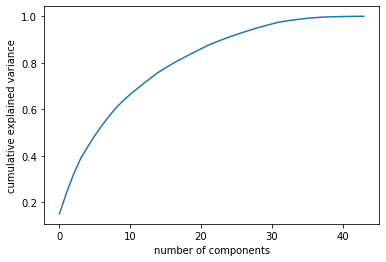

In [37]:
pca = PCA().fit(X_smote_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Part Two Summary:

1) Removed 5 fields from dataset

2) Converted categorical variables into numerical ones for final modeling stage

3) Used Standard Scaler to convert all variables onto the same scale

4) Split data into training and testing datasets, and used SMOTE to oversample so each group has similar number of records of people staying and leaving, due to imbalance in orignal dataset

5) Completed Principal Component Analysis, but won't include it in final modeling because I want to undertand feature importance of each variable on what impacts who will leave and who will stay at the company


## Part Three:  Modeling and Evaluation

Because of the nature of the highly imbalanced data, accuracy may not be the most meaningful metric to measure my model.  A model that predicts an employee stays 100% will be 84% accurate with this dataset.  So I will need to look at other metrics including:



Precision - (true positives)/(true positives+false positives)

Recall - (true positives)/(true positives+false negatives)

F1 Score - The harmonic mean of precision and recall metrics

AUC ROC - ROC curve is a plot that measures models ability to distinguish between positive and negative classsifers

In [38]:
#Modeling

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, auc, roc_auc_score, roc_curve, classification_report
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


#Classification
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, auc, roc_auc_score, roc_curve, classification_report
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report


# Settings
pd.options.display.float_format = "{:,.2f}".format
sns.set()
DIMS = (16,6)
color = sns.color_palette()

#### Baseline Modeling of Algorithms

In [39]:
# selection of algorithms to consider and set performance measure
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))

In [40]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10)  # 10 fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,58.84,5.16,59.62,5.29
1,Random Forest,57.66,7.17,83.85,3.76
2,Decision Tree Classifier,53.18,5.19,72.69,4.17


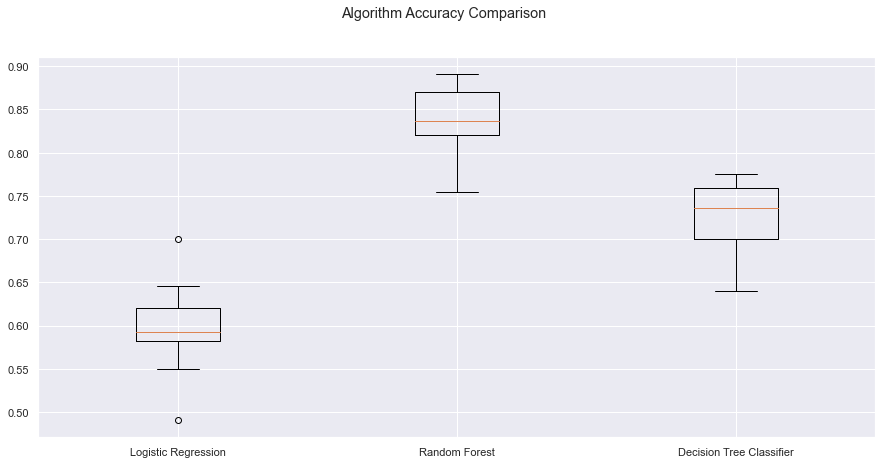

In [41]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

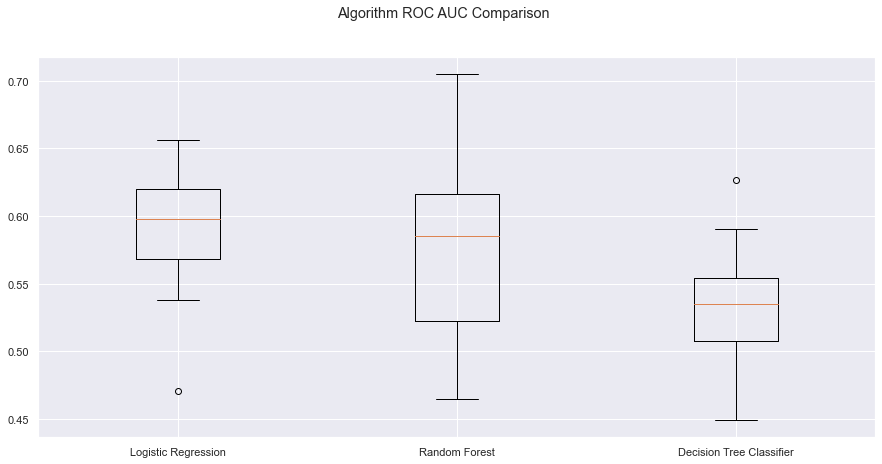

In [42]:

fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm ROC AUC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()

#### Comparison of No Oversampling vs SMOTE oversampling for optimal model performance

Accuracy: 0.5788043478260869 

              precision    recall  f1-score   support

           0       0.85      0.60      0.70       307
           1       0.19      0.46      0.27        61

    accuracy                           0.58       368
   macro avg       0.52      0.53      0.49       368
weighted avg       0.74      0.58      0.63       368



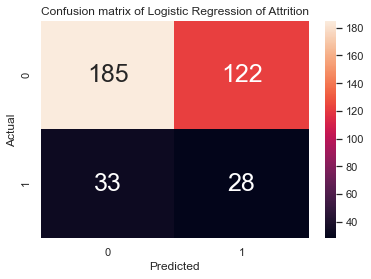

''

In [43]:
#### 1a) Logistic Regression  - No Oversampling


log_reg_model = LogisticRegression(solver='liblinear', random_state=12,
                                                         class_weight='balanced', max_iter=10000)
log_reg_results = log_reg_model.fit(X_train, y_train)
y_pred = log_reg_results.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
lr_asr = accuracy_score(y_test, y_pred)
print("Accuracy:", lr_asr, "\n")
print(classification_report(y_test, y_pred))

fig = plt.figure()
ax1 = fig.add_subplot(111)
sns.heatmap(cm, annot=True, fmt='.0f', annot_kws={"size": 25}, ax=ax1)
ax1.set_title("Confusion matrix of Logistic Regression of Attrition")
ax1.set_ylabel("Actual")
ax1.set_xlabel("Predicted")
plt.show()
;

Accuracy: 0.5760869565217391 

              precision    recall  f1-score   support

           0       0.84      0.61      0.70       307
           1       0.18      0.43      0.25        61

    accuracy                           0.58       368
   macro avg       0.51      0.52      0.48       368
weighted avg       0.73      0.58      0.63       368



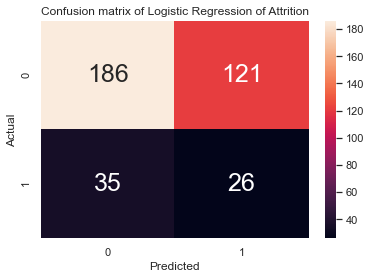

''

In [44]:
#### 1b) Logistic Regression  - SMOTE Oversampling


log_reg_model = LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced', max_iter=10000)
log_reg_results_SMOTE = log_reg_model.fit(X_smote_train, y_smote_train)
y_pred = log_reg_results_SMOTE.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
lr_asr = accuracy_score(y_test, y_pred)
print("Accuracy:", lr_asr, "\n")
print(classification_report(y_test, y_pred))

fig = plt.figure()
ax1 = fig.add_subplot(111)
sns.heatmap(cm, annot=True, fmt='.0f', annot_kws={"size": 25}, ax=ax1)
ax1.set_title("Confusion matrix of Logistic Regression of Attrition")
ax1.set_ylabel("Actual")
ax1.set_xlabel("Predicted")
plt.show()
;

Accuracy: 0.7255434782608695 

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       307
           1       0.23      0.28      0.25        61

    accuracy                           0.73       368
   macro avg       0.54      0.55      0.54       368
weighted avg       0.75      0.73      0.74       368



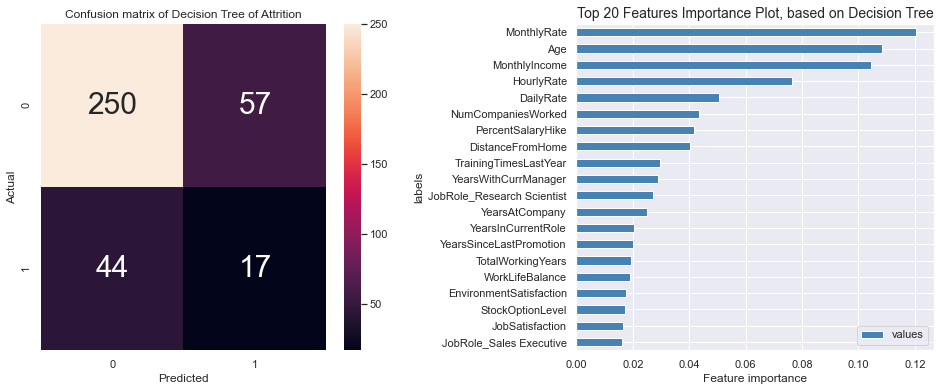

64.5 % contributed by top 10 features


In [45]:
#2a) Decision Tree - no oversampling

tree_model = DecisionTreeClassifier( random_state=12)
tree_results = tree_model.fit(X_train, y_train)
y_pred = tree_results.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
tree_asr = accuracy_score(y_test, y_pred)
print("Accuracy:", tree_asr, "\n")
print(classification_report(y_test, y_pred))

fig = plt.figure(figsize = DIMS)
ax1 = fig.add_subplot(121)
sns.heatmap(cm, annot=True, fmt='.0f', annot_kws={"size": 30}, ax=ax1)
ax1.set_title("Confusion matrix of Decision Tree of Attrition")
ax1.set_ylabel("Actual")
ax1.set_xlabel("Predicted")

# Variable importance of features

feats_df = pd.DataFrame({'labels' : field_list, 'values' : tree_results.feature_importances_}).sort_values(by = ["values"], ascending = True).tail(20)
ax = fig.add_subplot(122)

feats_df.plot(kind='barh', x='labels', y='values', ax=ax, color='steelblue')
ax.set_title("Top 20 Features Importance Plot, based on Decision Tree", fontsize=14)
ax.set_xlabel("Feature importance")

plt.subplots_adjust(hspace = 0.1, wspace = 0.5)
plt.show()

print(round(sum(feats_df["values"].tail(10))*100, 1), "% contributed by top 10 features")

Accuracy: 0.7228260869565217 

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       307
           1       0.22      0.26      0.24        61

    accuracy                           0.72       368
   macro avg       0.53      0.54      0.53       368
weighted avg       0.74      0.72      0.73       368



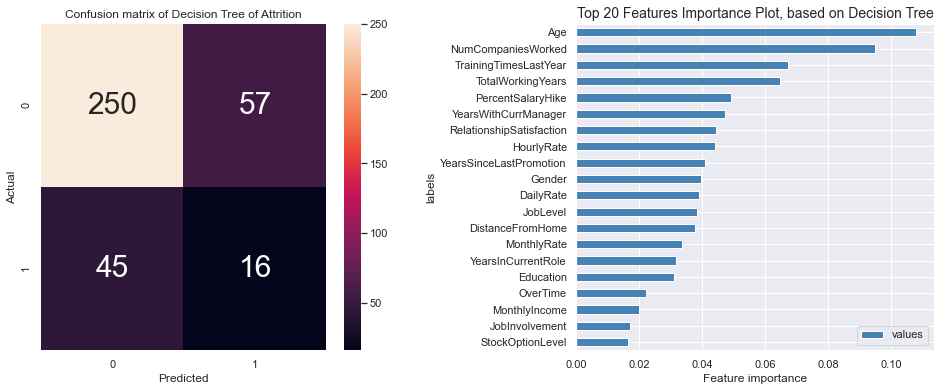

60.1 % contributed by top 10 features


In [46]:
#2b) Decision Tree - SMOTE

tree_model_SMOTE = DecisionTreeClassifier( random_state=7)
tree_results_SMOTE = tree_model_SMOTE.fit(X_smote_train, y_smote_train)
y_pred = tree_results_SMOTE.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
tree_asr = accuracy_score(y_test, y_pred)
print("Accuracy:", tree_asr, "\n")
print(classification_report(y_test, y_pred))

fig = plt.figure(figsize = DIMS)
ax1 = fig.add_subplot(121)
sns.heatmap(cm, annot=True, fmt='.0f', annot_kws={"size": 30}, ax=ax1)
ax1.set_title("Confusion matrix of Decision Tree of Attrition")
ax1.set_ylabel("Actual")
ax1.set_xlabel("Predicted")

# Variable importance of features

feats_df = pd.DataFrame({'labels' : field_list, 'values' : tree_results_SMOTE.feature_importances_}).sort_values(by = ["values"], ascending = True).tail(20)
ax = fig.add_subplot(122)

feats_df.plot(kind='barh', x='labels', y='values', ax=ax, color='steelblue')
ax.set_title("Top 20 Features Importance Plot, based on Decision Tree", fontsize=14)
ax.set_xlabel("Feature importance")

plt.subplots_adjust(hspace = 0.1, wspace = 0.5)
plt.show()

print(round(sum(feats_df["values"].tail(10))*100, 1), "% contributed by top 10 features")

Accuracy: 0.8342391304347826 

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       307
           1       0.50      0.02      0.03        61

    accuracy                           0.83       368
   macro avg       0.67      0.51      0.47       368
weighted avg       0.78      0.83      0.76       368



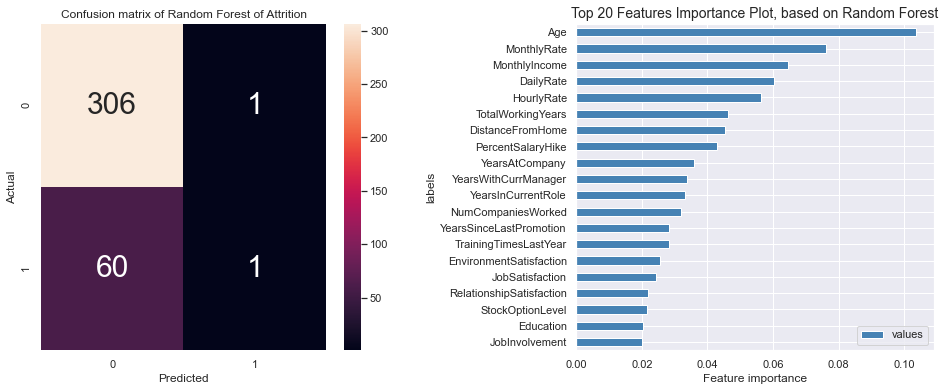

56.5 % contributed by top 10 features


In [47]:
#3a) Random Forest
forest_model = RandomForestClassifier(n_estimators=100, random_state=7)
forest_results = forest_model.fit(X_train, y_train)
y_pred = forest_results.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
forest_asr = accuracy_score(y_test, y_pred)
print("Accuracy:", forest_asr, "\n")
print(classification_report(y_test, y_pred))

fig = plt.figure(figsize = DIMS)
ax1 = fig.add_subplot(121)
sns.heatmap(cm, annot=True, fmt='.0f', annot_kws={"size": 30}, ax=ax1)
ax1.set_title("Confusion matrix of Random Forest of Attrition")
ax1.set_ylabel("Actual")
ax1.set_xlabel("Predicted")

# Variable importance of features

forest_feats_df = pd.DataFrame({'labels' : field_list, 'values' : forest_results.feature_importances_}).sort_values(by = ["values"], ascending = True).tail(20)
ax = fig.add_subplot(122)

forest_feats_df.plot(kind='barh', x='labels', y='values', ax=ax, color='steelblue')
ax.set_title("Top 20 Features Importance Plot, based on Random Forest", fontsize=14)
ax.set_xlabel("Feature importance")

plt.subplots_adjust(hspace = 0.1, wspace = 0.5)
plt.show()

print(round(sum(forest_feats_df["values"].tail(10))*100, 1), "% contributed by top 10 features")

Accuracy: 0.8315217391304348 

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       307
           1       0.44      0.07      0.11        61

    accuracy                           0.83       368
   macro avg       0.64      0.52      0.51       368
weighted avg       0.78      0.83      0.78       368



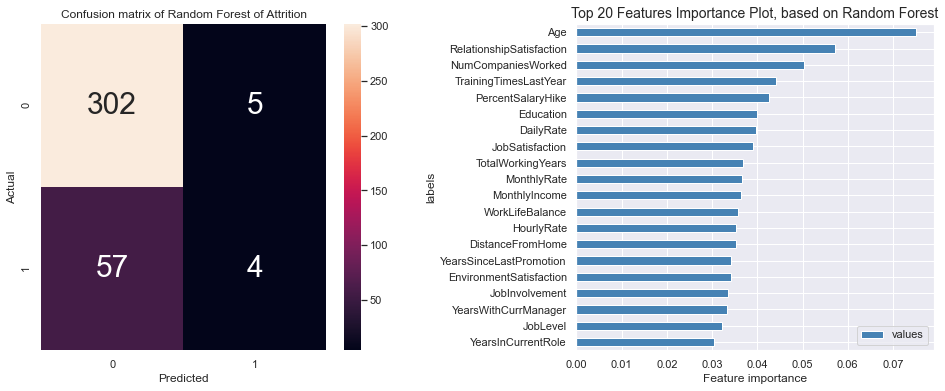

46.2 % contributed by top 10 features


In [48]:
#3b) Random Forest - SMOTE
forest_model_SMOTE = RandomForestClassifier(n_estimators=100, random_state=7)
forest_results_SMOTE = forest_model.fit(X_smote_train, y_smote_train)
y_pred = forest_results.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
forest_asr = accuracy_score(y_test, y_pred)
print("Accuracy:", forest_asr, "\n")
print(classification_report(y_test, y_pred))

fig = plt.figure(figsize = DIMS)
ax1 = fig.add_subplot(121)
sns.heatmap(cm, annot=True, fmt='.0f', annot_kws={"size": 30}, ax=ax1)
ax1.set_title("Confusion matrix of Random Forest of Attrition")
ax1.set_ylabel("Actual")
ax1.set_xlabel("Predicted")

# Variable importance of features

forest_feats_df = pd.DataFrame({'labels' : field_list, 'values' : forest_results_SMOTE.feature_importances_}).sort_values(by = ["values"], ascending = True).tail(20)
ax = fig.add_subplot(122)

forest_feats_df.plot(kind='barh', x='labels', y='values', ax=ax, color='steelblue')
ax.set_title("Top 20 Features Importance Plot, based on Random Forest", fontsize=14)
ax.set_xlabel("Feature importance")

plt.subplots_adjust(hspace = 0.1, wspace = 0.5)
plt.show()

print(round(sum(forest_feats_df["values"].tail(10))*100, 1), "% contributed by top 10 features")

In [49]:
# Calculate AUC

lr_prob = log_reg_results_SMOTE.predict_proba(X_test)[:,1]
lr_auc = roc_auc_score(y_test, lr_prob)

forest_prob = forest_results_SMOTE.predict_proba(X_test)[:,1]
forest_auc = roc_auc_score(y_test, forest_prob)

tree_prob = tree_results_SMOTE.predict_proba(X_test)[:,1]
tree_auc = roc_auc_score(y_test, tree_prob)

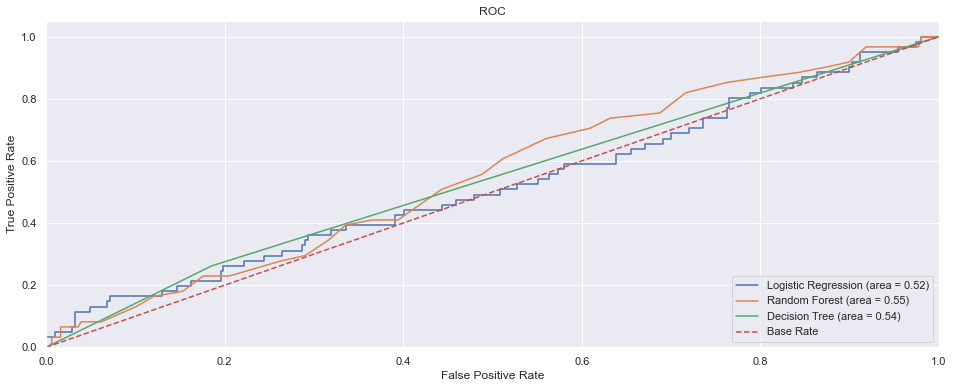

In [50]:
# Create ROC Chart

lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, log_reg_results_SMOTE.predict_proba(X_test)[:,1])
forest_fpr, forest_tpr, forest_thresholds = roc_curve(y_test, forest_results_SMOTE.predict_proba(X_test)[:,1])
tree_fpr, tree_tpr, tree_thresholds = roc_curve(y_test, tree_results_SMOTE.predict_proba(X_test)[:,1])

plt.figure(figsize = DIMS)

plt.plot(lr_fpr, lr_tpr, label = "Logistic Regression (area = %0.2f)" % lr_auc)
plt.plot(forest_fpr, forest_tpr, label = "Random Forest (area = %0.2f)" % forest_auc)
plt.plot(tree_fpr, tree_tpr, label = "Decision Tree (area = %0.2f)" % tree_auc)
plt.plot([0,1], [0,1], label = "Base Rate", linestyle = "--")

plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc = "lower right")
plt.show()

### Modeling Key Findings

1) All models AUC score was above baseline, but none of the models was more than .55, so none of them are very powerful models in their current state.

2) SMOTE models tended to perform better than standard sampling in terms of predicting the employees who would leave. More samples of employee data or a more balanced dataset would likely lead to improved predictions

3) Random Forest SMOTE model had the best balance of ROC AUC and accuracy performance.  This model also had the highest precision of the prediction of employees who left the company, which is more important than overall accuracy in this scenario of trying to predict employee attrition. 

4) In the baseline models, logistic regression had the highest AUC score (58.8 vs 57.6), but much lower accuracy than Random Forest (83.8 vs 59.6).  

5) Some of the top variables of importance in the top Random Forest model cannot be controlled, like Age or NumberofCompaniesWorked, but can be monitored as they are big factors towards attrition predicdtion as part of the model. However, there are several important factors in important variable list that can be adjusted to help increase employee retention, such as giving more development opportunities (TrainingTimesLastYear, Education) and make sure employees are paid fairly in relation to their position and tenure (Daily Rate, PercentSalaryHike). 